<a href="https://colab.research.google.com/github/aquapathos/BasicAI/blob/master/5CNN/MyUTKFaceDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

このプログラムはCPUでOK

# 性別判定学習用データ作成

何度も実験を行うために、データセットを作成してGoogle Driveに保存するためのプログラム

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile
import pandas as pd
import random
photos_dir = "/content/drive/MyDrive/FACES" # 画像保存用フォルダへのパス

UTKFaceから顔画像を入手する。（この作業は毎回実行する必要はなく、１度だけやればいい）
1. https://susanqq.github.io/UTKFace/ の [Aligned&Cropped Faces ](https://drive.google.com/drive/folders/0BxYys69jI14kU0I1YUQyY1ZDRUE?usp=sharing)　をクリック
<img src="https://i.imgur.com/wVOE6w5.png" width=300>
2. それぞれ右クリックし、「コピーを作成」で自分のGoogle Driveにコピーを作成する。Google Driveのトップに「crop_part1.tar.gz のコピー」「UTKFace.tar.gz のコピー」という名前のファイルが現れるはず。


In [ ]:
# コピーした顔画像データセットをFACESフォルダに移動し、”のコピー”を除去
%cd /content/drive/MyDrive
!if [ ! -e FACES ]; then mkdir FACES ; fi
!mv "crop_part1.tar.gz のコピー" FACES/crop_part1.tar.gz
!mv "UTKFace.tar.gz のコピー" FACES/UTKFace.tar.gz
%cd FACES
!tar zxf crop_part1.tar.gz
!tar zxf UTKFace.tar.gz

/content/drive/MyDrive
mkdir: cannot create directory ‘FACES’: File exists
/content/drive/MyDrive/FACES


# UTKFaceのファイル名と属性の関係
UTKFaceのファイル名は   
$$[age]_[gender]_[race]_[date&time].jpg$$
という規則でつけられている。

### 枚数を確認

In [ ]:
utkfiles = glob.glob(photos_dir + "/UTKFace/*.jpg")
crpfiles = glob.glob(photos_dir + "/crop_part1/*.jpg")
len(utkfiles),len(crpfiles)

(23708, 9780)

### 画像を確認

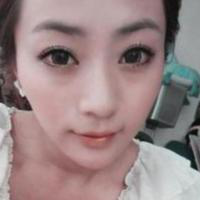

(200, 200) /content/drive/MyDrive/FACES/crop_part1/24_1_2_20170104020224692.jpg.chip.jpg


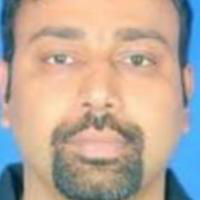

(None,
 (200, 200),
 '/content/drive/MyDrive/FACES/UTKFace/34_0_3_20170119200728660.jpg.chip.jpg')

In [ ]:
crpimage1 = Image.open(crpfiles[0])
utkimage1 = Image.open(utkfiles[0])
display(crpimage1),print(crpimage1.size,crpfiles[0])
display(utkimage1),utkimage1.size,utkfiles[0]

# 原始データセットの作成
さまざまな実験に使うために df という辞書配列に格納する

1. image - 64x64にリサイズしたPIL画像
2. age - 年齢
3. gender - 性別
4. race - 人種
5. fname - ファイル名

以下、UTKFaceのデータを対象とすることにする。crop_part1 を使いたければ同様の手順を実行すればいい。


In [ ]:
image_size = 64
df = pd.DataFrame(columns=['image', 'age', 'gender', 'race', 'fname'])
for file in utkfiles:
  img = Image.open(file) # PIL形式の画像
  img = img.convert("RGB")
  img = img.resize((image_size, image_size))
  fname = os.path.basename(file)
  props = fname.split('_')
  if len(props) != 4:
    continue # 情報が欠落しているデータはパス
  age = int(props[0])
  gender = int(props[1])
  race = int(props[2])
  data = {'image': img, 'age': age, 'gender':gender,'race':race, 'fname':fname}
  df = df.append(data, ignore_index=True)
df.head() # 先頭から５つ分を表示

,image,age,gender,race,fname
0,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200728660.jpg.chip.jpg
1,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200758796.jpg.chip.jpg
2,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200806004.jpg.chip.jpg
3,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200817301.jpg.chip.jpg
4,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200817972.jpg.chip.jpg


# 年齢条件での抜き出し


In [ ]:
df20_39 = df[(df['age']>=20) & (df['age']<40)] # 20歳以上40歳未満
df20_39.head() # 先頭から５つ表示

,image,age,gender,race,fname
0,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200728660.jpg.chip.jpg
1,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200758796.jpg.chip.jpg
2,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200806004.jpg.chip.jpg
3,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200817301.jpg.chip.jpg
4,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200817972.jpg.chip.jpg


次のようにしても同じ

In [ ]:
df20_39 = df.query('age >=20 and age <40')  # 20歳以上40歳未満
df20_39.head() # 先頭から５つ表示

,image,age,gender,race,fname
0,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200728660.jpg.chip.jpg
1,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200758796.jpg.chip.jpg
2,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200806004.jpg.chip.jpg
3,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200817301.jpg.chip.jpg
4,<PIL.Image.Image image mode=RGB size=64x64 at ...,34,0,3,34_0_3_20170119200817972.jpg.chip.jpg


# 性別と年齢で抜き出し

In [ ]:
df10agefemale = df.query('gender ==1 and  age < 10')  # 10歳未満の女性
df10agefemale.head() # 先頭から５つ表示

,image,age,gender,race,fname
1199,<PIL.Image.Image image mode=RGB size=64x64 at ...,5,1,4,5_1_4_20170116232419298.jpg.chip.jpg
1203,<PIL.Image.Image image mode=RGB size=64x64 at ...,8,1,0,8_1_0_20170117195424950.jpg.chip.jpg
1206,<PIL.Image.Image image mode=RGB size=64x64 at ...,9,1,1,9_1_1_20170117105556810.jpg.chip.jpg
1321,<PIL.Image.Image image mode=RGB size=64x64 at ...,4,1,0,4_1_0_20170116215618294.jpg.chip.jpg
1430,<PIL.Image.Image image mode=RGB size=64x64 at ...,6,1,0,6_1_0_20170119155357730.jpg.chip.jpg


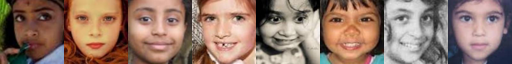

In [ ]:
# 画像を確認
dst = Image.new('RGB', (64*8, 64))
for i in range(8):
    dst.paste(df10agefemale['image'].iloc[i], (64*i,0))
dst

# 実験用原始データの保存
Colabでは作成したデータが消えてしまうのでDriveに保存しておこう。

In [ ]:
import pickle
# dfをpickle形式で保存
f = open(photos_dir + "/facedata.pkl",'wb')
pickle.dump(df,f)
f.close();

### 50MBごとに分割して保存


In [ ]:
%cd /content/drive/MyDrive/FACES/
!split -b 50M facedata.pkl facedata-

# 保存したデータを読み出して facedataという名で復元


In [ ]:
import pickle
f = open(photos_dir + "/facedata.pkl",'rb')
facedata = pickle.load(f);

### 読めてるか確認

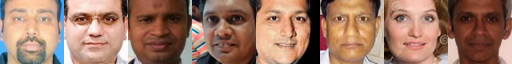

In [ ]:
# 画像を確認
dst = Image.new('RGB', (64*8, 64))
for i in range(8):
    dst.paste(facedata['image'].iloc[i], (64*i,0))
dst

# 注意
Google Driveに反映するまでにかなりの遅延がある。別タブでGoogle Driveにファイルが現れるまでは決してセッションを切らないこと。